# Introduction to Dynamics

Joe(y) Carpinelli  
2021-07-04

> **Offprint**
>
> This is a section from a control theory note-set I’m writing,
> **Exploring Control Theory**. It won’t be done for years! Over time,
> I’ll add chapters to the open-source repository,
> <https://github.com/cadojo/controls>. Some chapters that stand on
> their own will be added as blog posts [here](/blog/)!

## Overview

Our end goal as controls engineers is to *affect* a system in some
desired way. To do this, we’ll need a mathematical description of our
system. This mathematical description is known as a *model*. There’s a
famous [quote](https://en.wikipedia.org/wiki/All_models_are_wrong) about
mathematical models: “all models are wrong, but some are useful”.

This is really important. We are **always** approximating our system by
describing it with a model. The question we need to ask is “is our
approximate description of our system (our model) good enough?”

> **Definitions**
>
> -   **Model**: a mathematical description of a system

But what does this model *look like*? To answer this question, let’s
first discuss system dynamics, and equations of motion.

## Dynamics

If we want to *affect* a system, then by definition, the system *should*
be affect-able (is that a word?) by external forces. These “forces”
don’t necessarily need to be physical forces: consider the affect of
introducing new predators in an ecosystem with the goal of affecting
predator-prey populations.

So we have a mathematical description, and we know we’ll need some
changing *parameter* to affect the mathematical description. Sounds like
we need equations! The equations that govern our system are often called
*equations of motion*. Any system that changes due to some external
“force” is known as a *dynamical* system by definition.

The first step to any controls problem is identifying the *dynamics*;
this usually means defining the *equations of motion* for our system. A
set of *equations of motion* which describe our *dynamical* system
**is** our model.

## Example

A really common system in engineering is known as the
**spring-mass-damper**. We can roughly describe this system as a block
on a table, which is connected to a spring. We can *force* (a.k.a.
*affect*) this system by pulling on the block to extend or compress the
spring.

### Model Construction

Let’s figure out our equations of motion. The following question is
usually a useful starting point: “what are the forces on our system?” We
know we’ll have one external force: us pulling or pushing on the block!
Let’s call this external force $f_e$. We’ll also have a force due to the
spring, and a force due to the friction between the block and the table.
The force due to the spring will be *proportional* to the position of
the block with respect to the spring’s neutral position: let’s call the
spring constant $k$. The force due to friction will be proportional to
the *velocity* of the block (let’s forget about static friction for
now): let’s call the coefficient of friction $d$.

With all of the forces identified, we can start constructing the
*eqautions of motion* for this system. If we call our block’s position
$x$, then the acceleration $\ddot{x}$ will be equal to the sum of our
external force $f_e$, the spring force $k x$, and the force due to
friction $d \dot{x}$. Summing these forces produces the following
(common) spring-mass-damper equation, where $m$ is the mass of the
block.

<span id="eq-forced-mass-damper">$$
f_e = m \ddot{x} + d \dot{x} + k x
 \qquad(1)$$</span>

We have our model! This is a second-order differential equation
([Equation 1](#eq-forced-mass-damper)). It helps to divide all variables
into two groups: parameters, and states. States describe the system at
some point in time. In this case, state variables answer the following
questions: “where is the block, what is the velocity of the block, and
what is the acceleration of the block?” One set of valid state variables
for this system is $x$ and $\dot{x}$; we don’t need to include
$\ddot{x}$ in our list of state variables because we can calculate
$\ddot{x}$ from $x$ and $\dot{x}$.

> **Note**
>
> We say “one set of state variables” because there may (and nearly
> always are) other valid state representations that could completely
> describe this system! State variables are **not** unique.

If we leave states as symbolic, and then look to the equation(s) of
motion of a system, the *parameters* describe a specific *instance* of a
system. Put another way, no matter what values $f_e$, $d$, and $k$ take,
this equation of motion is identifiable as a spring-mass-damper. For
this reason, we can specify $f_e$, $d$, and $k$ as parameters. We can
assume a unit mass for the block for now.

> **Note**
>
> The parameter $f_e$ is our *control* parameter in this example,
> because we can change $f_e$ to affect our system. For now, let’s not
> differentiate between control parameters and non-control parameters.

### Coding our Model

We can simulate these dynamics with Julia’s `DifferentialEquations`
package. If you’re familiar with MATLAB, `DifferentialEquations`
provides numerical integration solvers that are similar to MATLAB’s
`ode45` (and similar) solvers. We can use the `ModelingToolkit` package
to conveniently put our model to code, and interface with
`DifferentialEquations` for simulation.

In [2]:
using ModelingToolkit, DifferentialEquations, Plots

Now that we have access to `ModelingToolkit`, let’s build the model!

In [3]:
@parameters t fₑ d k
@variables x(t) ẋ(t)
δ = Differential(t)

eqs = [
    δ(x) ~ ẋ,
    δ(ẋ) ~ -d * ẋ - k * x + fₑ
]

model = ODESystem(eqs, t, [x, ẋ], [fₑ, d, k]; name=:HarmonicOscillator)

### Simulating our Model

With `model` defined above, we can use `DifferentialEquations` to
simulate our system. Of course, to do this we’ll need to specify
numerical values for our parameters, and initial conditions (the
simulation starting point) for our state variables. The code below
specifies some arbitrary initial conditions and constant parameter
values, and simulates the resulting dynamics.


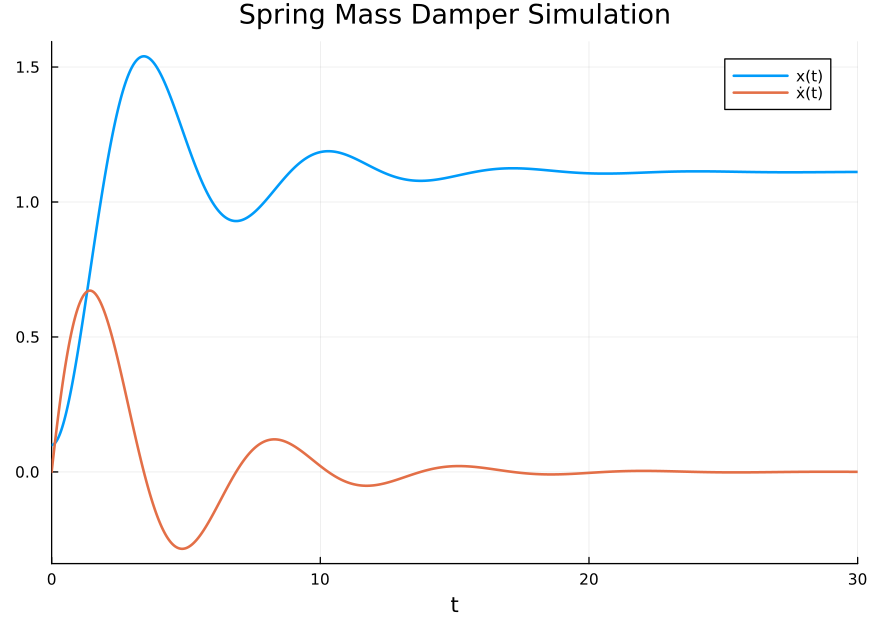

In [4]:
problem = let x₀ = 0.1, ẋ₀ = 0.0, dₙ = 0.5, kₙ = 0.9, fₙ = 1.0, Δt = 30.0
    ODEProblem(
        model,
        [x => x₀, ẋ => ẋ₀],
        (0.0, Δt),
        [d => dₙ, k => kₙ, fₑ => fₙ]
    )
end

solutions = solve(problem, Tsit5(); reltol=1e-12, abstol=1e-12)
plot(solutions; linewidth=2, dpi=130, title="Spring Mass Damper Simulation")